# Telecom

## 1.Data Understanding and Exploration

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline 
import seaborn as sns
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
df1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")

In [3]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [4]:
df1.shape

(7043, 10)

In [5]:
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df2.dtypes

customerID           object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df3 = pd.merge(df1,df2, how='outer', on='customerID')
df3.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [8]:
df3.shape

(7043, 21)

In [9]:
len1 = len(df1.columns) # Length of column in dataframe 1
print(len1)
len2 = len(df2.columns) # Length of column in dataframe 2
print(len2)
len_combined = len1 + len2
print(len_combined)

10
12
22


In [10]:
len3 = len(df3.columns) # Length of merged dataframe
print(len3)

21


In [11]:
if len3 == (len_combined-1): #Since we are merging based on customer id our target data will have only one customer id
    print(" All columns are incorporated")
else:
    print(" Column is missing")

 All columns are incorporated


In [12]:
df3.to_csv('Telecom_churn.csv')

## 2. Data cleaning and analysis

In [13]:
df3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null values in the dataframe

In [14]:
df3.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df3['TotalCharges'].dtypes

dtype('O')

In [16]:
df3['TotalCharges'].isna().sum()

0

In [17]:
df3.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [18]:
df3 = df3.replace('No phone service', 'No')
df3 = df3.replace('No internet service', 'No')
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df3['TotalCharges'].dtype
df3[df3['TotalCharges'] == ' ']
df3['TotalCharges'] = pd.to_numeric(df3['TotalCharges'], errors='coerce')
df3['TotalCharges'].isnull().sum()
df3.dropna(inplace= True)
df3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df3.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [21]:
def piechart():
    global df3
    colnames = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
    y=len(colnames)
    for i in range(y):
        ncols=1
        nrows=len(colnames)
        ax = plt.subplot(nrows, ncols, i+1)
        ax = (df3[colnames[i]].value_counts()*100.0 /len(df3))\
        .plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(20,20), fontsize = 12 )                                                                           
        ax.set_ylabel(colnames[i],fontsize = 12)
        ax.set_title(colnames[i], fontsize = 12)
        plt.show()
        print('\n')

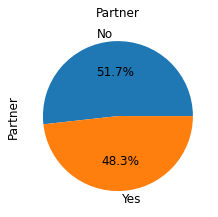

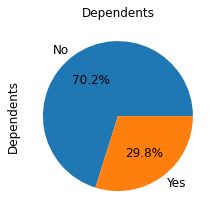

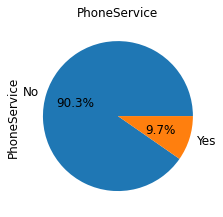

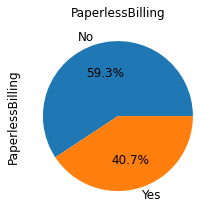

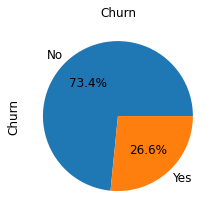

In [22]:
piechart()

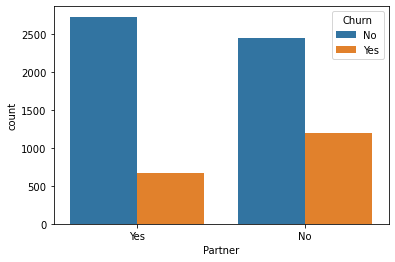

In [23]:
sns.countplot(x="Partner", hue="Churn", data=df3);

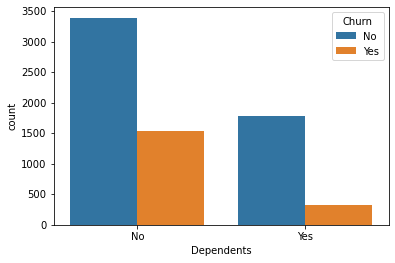

In [24]:
sns.countplot(x="Dependents", hue="Churn", data=df3);

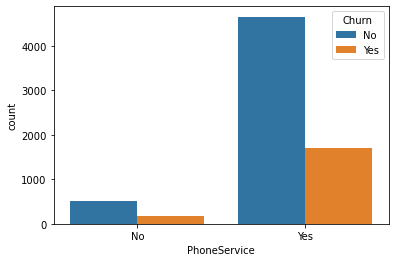

In [25]:
sns.countplot(x="PhoneService", hue="Churn", data=df3);

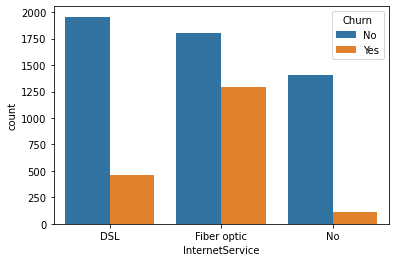

In [26]:
sns.countplot(x="InternetService", hue="Churn", data=df3);

It is shown that customer with phone service will not churn the telecom.. Fiber optic customer churn more as the technology or connection has to be improved in order to retain the customer..

In [27]:
def label_encoding():
    global df3
    colnames1 = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
    y=len(colnames1)
    for i in range(y):
        from sklearn import preprocessing
        label_encoder = preprocessing.LabelEncoder()
        df3[colnames1[i]]= label_encoder.fit_transform(df3[colnames1[i]])

In [28]:
label_encoding()

In [29]:
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [30]:
df3.shape

(7032, 21)

In [31]:
from sklearn.model_selection import train_test_split

X = df3.drop(['customerID','Churn'], axis=1)
Y = df3[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3457,0,0,0,0,1,1,0,2,0,0,0,0,0,0,0,1,3,19.50,19.50
612,1,0,0,1,66,1,0,2,0,0,0,0,0,0,2,0,3,20.55,1357.10
589,1,0,1,1,71,1,1,0,1,1,1,1,1,1,2,0,2,90.40,6668.05
2685,0,0,1,0,72,1,1,1,1,1,1,0,1,0,2,0,0,100.65,7334.05
1549,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,3,45.85,45.85


In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(x_train))
x_train = X_train2
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.009467,-0.442483,-0.961453,-0.652299,-1.273676,0.323198,-0.864544,1.534968,-0.633243,-0.728717,-0.726431,-0.647595,-0.795786,-0.791918,-0.829318,0.830480,1.322122,-1.508689,-0.995607
1,0.990622,-0.442483,-0.961453,1.533039,1.373390,0.323198,-0.864544,1.534968,-0.633243,-0.728717,-0.726431,-0.647595,-0.795786,-0.791918,1.571564,-1.204123,1.322122,-1.473855,-0.409302
2,0.990622,-0.442483,1.040092,1.533039,1.577011,0.323198,1.156679,-1.182324,1.579173,1.372274,1.376593,1.544175,1.256619,1.262758,1.571564,-1.204123,0.384535,0.843392,1.918629
3,-1.009467,-0.442483,1.040092,-0.652299,1.617735,0.323198,1.156679,0.176322,1.579173,1.372274,1.376593,-0.647595,1.256619,-0.791918,1.571564,-1.204123,-1.490637,1.183432,2.210555
4,0.990622,-0.442483,-0.961453,-0.652299,-1.273676,0.323198,-0.864544,-1.182324,-0.633243,-0.728717,-0.726431,-0.647595,-0.795786,-0.791918,-0.829318,0.830480,1.322122,-0.634537,-0.984057


In [33]:
x_test2 = pd.DataFrame(sc_X.transform(x_test))
x_test = x_test2
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.009467,-0.442483,-0.961453,-0.652299,-1.273676,0.323198,-0.864544,1.534968,-0.633243,-0.728717,-0.726431,-0.647595,-0.795786,-0.791918,-0.829318,0.830480,1.322122,-1.508689,-0.995607
1,0.990622,-0.442483,-0.961453,1.533039,1.373390,0.323198,-0.864544,1.534968,-0.633243,-0.728717,-0.726431,-0.647595,-0.795786,-0.791918,1.571564,-1.204123,1.322122,-1.473855,-0.409302
2,0.990622,-0.442483,1.040092,1.533039,1.577011,0.323198,1.156679,-1.182324,1.579173,1.372274,1.376593,1.544175,1.256619,1.262758,1.571564,-1.204123,0.384535,0.843392,1.918629
3,-1.009467,-0.442483,1.040092,-0.652299,1.617735,0.323198,1.156679,0.176322,1.579173,1.372274,1.376593,-0.647595,1.256619,-0.791918,1.571564,-1.204123,-1.490637,1.183432,2.210555
4,0.990622,-0.442483,-0.961453,-0.652299,-1.273676,0.323198,-0.864544,-1.182324,-0.633243,-0.728717,-0.726431,-0.647595,-0.795786,-0.791918,-0.829318,0.830480,1.322122,-0.634537,-0.984057


In [34]:
xgb_model1 = xgb.XGBClassifier(objective= 'binary:logistic' ,use_label_encoder=False, random_state=1 )
xgb_model1.fit(x_train, y_train.values.ravel())
y_pred1 = xgb_model1.predict(x_test)
model_score1 = xgb_model1.score(x_test, y_test)
print(model_score1)
model_score2 = xgb_model1.score(x_train, y_train)
print(model_score2)

[10:13:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7931769722814499
0.9370666666666667


<AxesSubplot:>

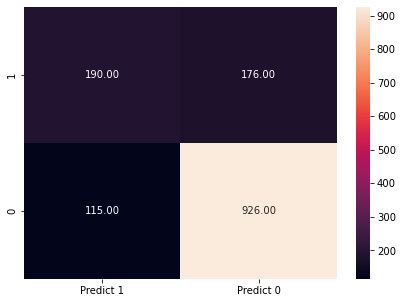

In [35]:
cm=metrics.confusion_matrix(y_test, y_pred1, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='.2f')

In [36]:
print(classification_report(y_test, y_pred1, digits=2))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.62      0.52      0.57       366

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407



In [37]:
xgb_model = xgb.XGBClassifier(objective="reg:linear",use_label_encoder=False, random_state=1 )
xgb_model.fit(x_train, y_train.values.ravel())
y_pred = xgb_model.predict(x_test)
model_score = xgb_model.score(x_test, y_test)
print(model_score)
model_score_T = xgb_model.score(x_train, y_train)
print(model_score_T)

[10:13:07] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
0.7768301350390903
0.9573333333333334


<AxesSubplot:>

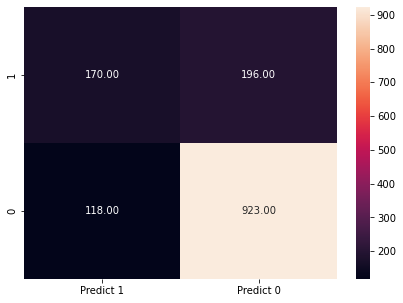

In [38]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='.2f')

In [39]:
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1041
           1       0.59      0.46      0.52       366

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



In [40]:
xgb_model3 = xgb.XGBClassifier(objective="binary:logistic",use_label_encoder=False, random_state=42, eval_metric="auc")

xgb_model3.fit(x_train, y_train.values.ravel())
y_pred = xgb_model3.predict(x_test)
model_score3 = xgb_model3.score(x_test, y_test.values.ravel())
print(model_score3)


0.7931769722814499


In [41]:
xgb_modeln = xgb.XGBClassifier(objective= 'binary:logistic' ,use_label_encoder=False, n_estimators=10, random_state=42 )
xgb_modeln.fit(x_train, y_train.values.ravel())
y_predn = xgb_modeln.predict(x_test)
model_scoren = xgb_modeln.score(x_test, y_test)
print(model_scoren)
model_scoren1 = xgb_modeln.score(x_train, y_train)
print(model_scoren1)

[10:13:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7967306325515281
0.8321777777777778


### The final model is XGBoost with binary- logistic classification has best accuracy on test set with estimators =10

# Part B

# Domain: IT

In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline 
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")
from vecstack import stacking
  
 
    
    
def get_data():
    global df
    df = pd.read_csv("Telecom_churn.csv")
    print ('Done Loading')
    
def shape_head():
    print(df.head())
    print(df.shape)
    
    
def replace():
    global df
    df = df.replace('No phone service', 'No')
    df = df.replace('No internet service', 'No')

def drop_null():
    global df
    df['TotalCharges'].dtype
    df[df['TotalCharges'] == ' ']
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].isnull().sum()
    df.dropna(inplace= True)
    df.isnull().sum()

def label_encoding():
    global df
    colnames1 = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
    y=len(colnames1)
    for i in range(y):
        from sklearn import preprocessing
        label_encoder = preprocessing.LabelEncoder()
        df[colnames1[i]]= label_encoder.fit_transform(df[colnames1[i]])
    print('After encoding\n')
    print(df.head())    

def train_test_set():
    global X,Y,x_train, x_test, y_train, y_test

    X = df.drop(['customerID','Churn'], axis=1)
    Y = df[['Churn']]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    print(x_train.head())
    
def standard():
    from sklearn.preprocessing import StandardScaler
    global x_train, X_train2, x_test, X_test2
    scale_X = StandardScaler()
    X_train2 = pd.DataFrame(scale_X.fit_transform(x_train))
    x_train = X_train2

    x_test2 = pd.DataFrame(scale_X.transform(x_test))
    x_test = x_test2
    print('\n',x_test.head())

def predict():
    logreg()
    knn()
    naive()
    svm()
    random()
    xgb()
    
def logreg():
    global model
    model = LogisticRegression()
    model.fit(x_train, y_train.values.ravel())
    y_predict = model.predict(x_train)
    y_predict1 = model.predict(x_test)
    acc_score_logregtest = 100*round(accuracy_score(y_test,y_predict1),2)
    print('\nAccuracy score of test Logistic regression', acc_score_logregtest)
    print('\n')
    acc_score_logregtrain = 100*round(accuracy_score(y_train,y_predict),2)
    print('Accuracy score of train Logistic regression', acc_score_logregtrain)
    
def knn():
    global knn_1
    knn_1 = KNeighborsClassifier()
    knn_1.fit(x_train,y_train.values.ravel())
    train_pred = knn_1.predict(x_train)
    test_pred = knn_1.predict(x_test)
    acc_score_knntest = 100*round(accuracy_score(y_test,test_pred),2)
    print('\nAccuracy score of test KNN', acc_score_knntest)
    print('\n')
    acc_score_knntrain = 100*round(accuracy_score(y_train,train_pred),2)
    print('Accuracy score of train KNN', acc_score_knntrain)
    
def naive():
    global nb_model
    nb_model = GaussianNB()

    nb_model.fit(x_train, y_train.values.ravel())
    nb_train_predict = nb_model.predict(x_train)
    nb_test_predict = nb_model.predict(x_test)
    acc_score_NBtest = 100*round(accuracy_score(y_test,nb_test_predict),2)
    print('\nAccuracy score of test Gaussian', acc_score_NBtest)
    print('\n')
    acc_score_NBtrain = 100*round(accuracy_score(y_train,nb_train_predict),2)
    print('Accuracy score of train Gaussian', acc_score_NBtrain)
    
    
def svm():
    global svc_model
    svc_model = SVC(C= .1, kernel='linear', gamma= 1)
    svc_model.fit(x_train, y_train.values.ravel())

    prediction = svc_model .predict(x_test)
    prediction1 = svc_model .predict(x_train)
    
    acc_score_svm= 100*round(accuracy_score(y_test,prediction),2)
    print('\nAccuracy score of test SVM', acc_score_svm)
    print('\n')
    acc_score_svm1= 100*round(accuracy_score(y_train,prediction1),2)
    print('\nAccuracy score of train SVM', acc_score_svm1)
    print('\n')
    
def random():
    global rfcl
    rfcl = RandomForestClassifier(n_estimators = 10, random_state=1 , max_features=5, criterion='entropy')
    rfcl = rfcl.fit(x_train, y_train.values.ravel())
    y_predict = rfcl.predict(x_test)
    y_predict1 = rfcl.predict(x_train)
    acc_score_rfcl= 100*round(accuracy_score(y_test,y_predict),2)
    print('\nAccuracy score of test Random forest', acc_score_rfcl)
    print('\n')
    acc_score_rfcl1= 100*round(accuracy_score(y_train,y_predict1),2)
    print('\nAccuracy score of train Random forest', acc_score_rfcl1)
    print('\n')
    
def xgb():
    global xgb_modeln
    import xgboost as xgb
    xgb_modeln = xgb.XGBClassifier(objective= 'binary:logistic' ,use_label_encoder=False, n_estimators=10, random_state=42 )
    xgb_modeln.fit(x_train, y_train.values.ravel())
    y_predn = xgb_modeln.predict(x_test)
    y_predn1 = xgb_modeln.predict(x_train)
    xgb_train = 100*round(accuracy_score(y_train, y_predn1),2)
    print('\nAccuracy score of train XGBoost',xgb_train)
    print('\n')
    xgb_test = 100*round(accuracy_score(y_test,y_predn),2)
    print('Accuracy score of test XGBoost', xgb_test)
    
def stack():
    import xgboost as xgb
    global stack_test, stack_train, X,Y,x_train, x_test, y_train, y_test, df, logrig
    models = [ KNeighborsClassifier(n_neighbors=5),
               RandomForestClassifier(n_estimators = 10, random_state=1 , max_features=5, criterion='entropy'),
               xgb.XGBClassifier(objective= 'binary:logistic' ,use_label_encoder=False, n_estimators=10, random_state=42 )
             ]
    stack_train, stack_test = stacking (models,                   
                             x_train, y_train, x_test,   
                             regression=False, 
                             mode='oof_pred_bag', 
                             needs_proba=False,
                             save_dir=None, 
                             metric=accuracy_score, 
                             n_folds=4, 
                             stratified=True,
                             shuffle=True,  
                             random_state=0,    
                             verbose=2)
    logrig =  LogisticRegression()
    logrig.fit(stack_train, y_train.values.ravel())
    y_final = logrig.predict(stack_train)
    y_final1 = logrig.predict(stack_test)
    logrig_score = 100*round(accuracy_score(y_test,y_final1),2)
    print('\nAccuracy score of test Stack Logistic regression', logrig_score)
    print('\n')
    logrig_score1 = 100*round(accuracy_score(y_train,y_final),2)
    print('Accuracy score of train Stack Logistic regression', logrig_score1)
    
def pickle():
    import pickle
    file = 'Logistic_regression.sav'
    pickle.dump(model,open(file, 'wb'))
    
    file = 'KNN_classifier.sav'
    pickle.dump(knn_1,open(file, 'wb'))
    
    file = 'Naive_Bayes_classifer.sav'
    pickle.dump(nb_model,open(file, 'wb'))
    
    file = 'Random_forest_classifier.sav'
    pickle.dump(rfcl,open(file, 'wb'))
    
    file = 'XGBoost.sav'
    pickle.dump(xgb_modeln,open(file, 'wb'))
    
    file = 'Stack_final.sav'
    pickle.dump(logrig,open(file, 'wb'))
    
    file = 'SVM.sav'
    pickle.dump(svc_model,open(file, 'wb'))
    
def mainloop():
    get_data()
    shape_head()
    replace()
    drop_null()
    label_encoding()
    train_test_set()
    standard()
    predict()
    stack()
    pickle()
    


    
mainloop()  

Done Loading
   Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0           0  7590-VHVEG  Female              0     Yes         No       1   
1           1  5575-GNVDE    Male              0      No         No      34   
2           2  3668-QPYBK    Male              0      No         No       2   
3           3  7795-CFOCW    Male              0      No         No      45   
4           4  9237-HQITU  Female              0      No         No       2   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Paperless

[10:13:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    fold  2:  [0.79302987]
[10:13:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    fold  3:  [0.77667141]
    ----
    MEAN:     [0.79466466] + [0.01144015]
    FULL:     [0.79466667]


Accuracy score of test Stack Logistic regression 79.0


Accuracy score of train Stack Logistic regression 80.0
